# Get datasets

In [1]:
# import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
# Find correct folder to use - /Users/shim/Desktop/AI/CovidbyGovt
%pwd

'/Users/shim/Desktop/AI/CovidbyGovt/analysis3'

## Import Covid-19 global data

In [3]:
# direct link to John Hopkins global timeset data 
data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

covid = pd.read_csv(data, sep=",")

# preview our data
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,23,25,30,30,30,33,36,36,40
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,24,25,26,26,26,26,26,26,27
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,313,326,336,348,364,367,375,384,392,402
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,29,31,33,33,35,35,36,37,37,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


## Quick analysis of data

In [4]:
today = datetime.now()

# if time is after 5pm (Tucson time), then use today's date 
today5pm = today.replace(hour=17, minute=1, second=0, microsecond=0)
if today > today5pm:
    date = today  

# otherwise use yesterday's date
else:
    date = today - timedelta(1)

# date in string format
date = date.strftime('%D').lstrip("0").replace(" 0", " ")
date = date.replace("/0", "/")
date

'4/22/20'

In [5]:
# get WW death total
covid[[date]].sum()

4/22/20    183025
dtype: int64

In [6]:
# get US death counts
covid[date][covid["Country/Region"]=='US'].sum()

46583

## Visualize data

In [7]:
# get country totals 
country_totals = covid.groupby(['Country/Region']).sum().reset_index()
country_totals.rename(columns = {date:"deaths", "Country/Region": "country"}, inplace = True)
country_totals[['country', 'deaths']].sort_values(by="deaths", ascending=False).head(20)

,country,deaths
171,US,46583
84,Italy,25085
156,Spain,21717
61,France,21373
175,United Kingdom,18151
16,Belgium,6262
80,Iran,5391
65,Germany,5279
36,China,4636
120,Netherlands,4068


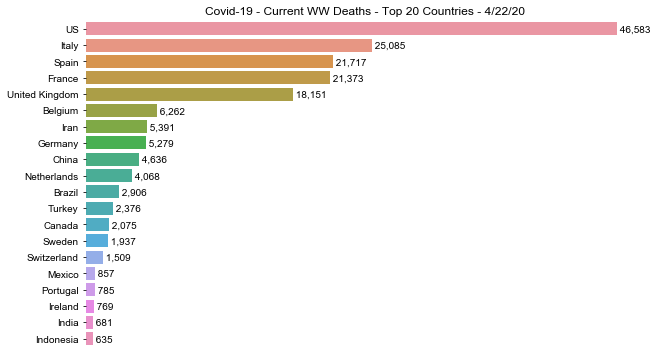

In [8]:
# add value labels on chart
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - float(space/2)
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# select subplot SIZE
fig, ax = plt.subplots(figsize=(10, 6))  

# REPLACE data
data = country_totals.sort_values(by='deaths', ascending=False).head(20)
g = sns.barplot(ax=ax, x='deaths', y='country', data=data)

# set DATE
current_date = str(date)

# put VALUES on selected data
show_values_on_bars(g, "h")  

# remove SPINES
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove LABELS.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom TICKS
g.set(xticks=[])

# set TITLE
g.set_title("Covid-19 - Current WW Deaths - Top 20 Countries - {}".format(current_date))

# SAVE graph to a file
g.figure.savefig("top20_countries.png")

## Investigate ICU Dataset

In [9]:
icu = pd.read_excel('../data/Other/ICU/KHN_ICU_bed_county_analysis_2.xlsx')
icu.head()

,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct,60plus_per_each_icu_bed
0,1001,Autauga,AL,Alabama,1,1,6,55036,10523,0.191,1754.0
1,1003,Baldwin,AL,Alabama,3,3,51,203360,53519,0.263,1049.0
2,1005,Barbour,AL,Alabama,1,1,5,26201,6150,0.235,1230.0
3,1007,Bibb,AL,Alabama,1,1,0,22580,4773,0.211,NaN
4,1009,Blount,AL,Alabama,1,1,6,57667,13600,0.236,2267.0


In [10]:
# check data
icu.isna().sum()

cnty_fips                       0
cnty_name                       0
st                              0
state                           0
hospitals_in_cost_reports       0
Hospitals_in_HC                 0
all_icu                         0
Total_pop                       0
60plus                          0
60plus_pct                      0
60plus_per_each_icu_bed      1665
dtype: int64

In [11]:
# remove column
icu.drop(['60plus_per_each_icu_bed'], axis=1, inplace=True)

In [12]:
# AZ ICU beds by Population
AZ_icu = icu[icu['st'] == 'AZ'].sort_values(by="Total_pop", ascending=False).head(15)
AZ_icu

,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
103,4013,Maricopa,AZ,Arizona,31,34,1004,4155501,808534,0.195
106,4019,Pima,AZ,Arizona,9,9,296,1007257,245814,0.244
107,4021,Pinal,AZ,Arizona,4,4,22,405537,100086,0.247
109,4025,Yavapai,AZ,Arizona,2,2,39,220972,85127,0.385
104,4015,Mohave,AZ,Arizona,4,4,80,204691,73559,0.359
110,4027,Yuma,AZ,Arizona,1,1,42,204281,45739,0.224
98,4005,Coconino,AZ,Arizona,3,3,41,138639,23195,0.167
97,4003,Cochise,AZ,Arizona,4,4,12,126516,35231,0.278
105,4017,Navajo,AZ,Arizona,4,4,12,107902,24267,0.225
96,4001,Apache,AZ,Arizona,4,4,0,71602,14107,0.197


# US by State covid data - merged with ICU data

In [13]:
# direct link to John Hopkins US timeset data 
data2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

covid_US = pd.read_csv(data2, sep=",")

# preview our data
covid_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,45,45,51,56,58,60,62,63,64,63
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,1,2,3,3,3,3,3


In [14]:
covid_US.shape

(3261, 104)

In [15]:
# check US death counts
covid_US[date].sum()

46583

Missing a data point with the global data - because of changing data, I'm not going to worry about this now.

In [16]:
# merge icu with Covid_US deaths - outer join to collect all deaths (some deaths may not be isolated to county level)
left = covid_US
right = icu
county_deaths = pd.merge(left, right, 
              how='outer', on=None, 
              left_on="FIPS", right_on="cnty_fips")
county_deaths

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3257,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3258,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3259,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# remove columns that are doubled by merge
county_deaths.drop(columns=['cnty_fips','cnty_name','state'])

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/20/20,4/21/20,4/22/20,st,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,63,64,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3257,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,17,19,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3258,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3259,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualize - US State Data

In [18]:
# group the state deaths
states = county_deaths[['Province_State', date]].copy()
states = states.groupby(['Province_State'], sort=False).sum().reset_index()

# show descending
states = states.sort_values(by=date, ascending=False)
states.head(10)

,Province_State,4/22/20
37,New York,19413
35,New Jersey,5150
27,Michigan,2813
26,Massachusetts,2182
43,Pennsylvania,1673
18,Illinois,1565
11,Connecticut,1544
23,Louisiana,1473
9,California,1421
14,Florida,893


In [19]:
# check total deaths
states[date].sum()

46583

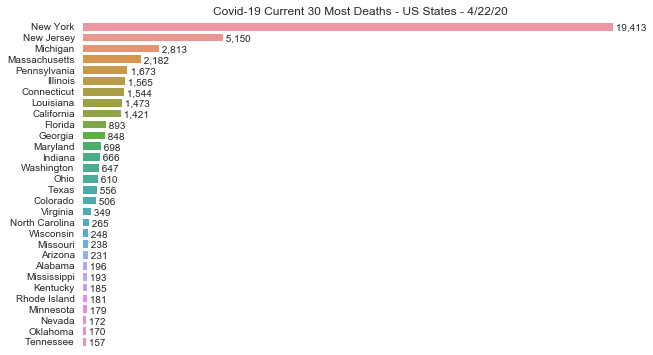

In [20]:
# function for setting horizontal labels
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# REPLACE dataset
data = states.head(30)
current_date = str(date)

# plot VALUES on selected data
g = sns.barplot(ax=ax, x=date, y='Province_State', data=data)
show_values_on_bars(g, "h")  

# remove spines
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove labels.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom values
g.set(xticks=[])

# set TITLE
g.set_title("Covid-19 Current 30 Most Deaths - US States - {}".format(current_date))

# save graph to a FILENAME
g.figure.savefig("US_states30.png")

## Visualize - AZ County Deaths

In [21]:
# tally of county deaths
co = county_deaths[['Admin2', 'Province_State', date]].copy()
co.rename(columns = {'Admin2':'county','Province_State':'state',date:'total_deaths'}, inplace = True)
co = co.sort_values(by='total_deaths', ascending=False)
co.head(10)

,county,state,total_deaths
1863,New York,New York,15074
1862,Nassau,New York,1431
1317,Wayne,Michigan,1319
615,Cook,Illinois,1072
1884,Suffolk,New York,926
1785,Essex,New Jersey,888
1780,Bergen,New Jersey,876
1892,Westchester,New York,838
209,Los Angeles,California,732
1787,Hudson,New Jersey,657


In [22]:
# check total deaths
co["total_deaths"].sum()

46583

In [23]:
# check AZ totals by county
AZ_county = co[co['state']=='Arizona']
AZ_county

,county,state,total_deaths
108,Maricopa,Arizona,97
111,Pima,Arizona,68
103,Coconino,Arizona,35
110,Navajo,Arizona,12
112,Pinal,Arizona,8
101,Apache,Arizona,5
109,Mohave,Arizona,3
114,Yavapai,Arizona,1
115,Yuma,Arizona,1
107,La Paz,Arizona,1


Hmmm...Unassigned and Out of AZ need to reassigned ... eventually...for now I'll keep them in the totals

In [24]:
# deaths in AZ - check with chart of states
AZ_county['total_deaths'].sum()

231

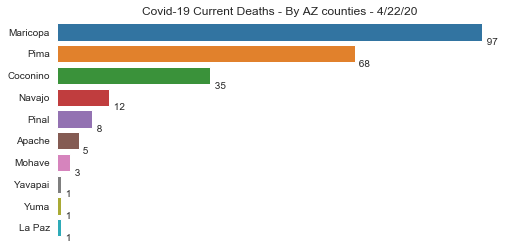

In [25]:
# add values on chart
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()+ float(space/2)
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# select subplot size
fig, ax = plt.subplots(figsize=(8, 4))  

# put values on selected data
data = AZ_county[AZ_county['total_deaths'] >= 1]
g = sns.barplot(ax=ax, x='total_deaths', y='county', data=data)
show_values_on_bars(g, "h")  

# remove spines
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove labels.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom values
g.set(xticks=[])

# set title
g.set_title("Covid-19 Current Deaths - By AZ counties - {}".format(str(date)))

# save graph to a file
g.figure.savefig("AZ_counties.png")

# Timeseries - Worldwide

In [26]:
# look at past month worldwide
covid_ww = covid.iloc[:, 4:].sum(axis=0)
df = covid_ww.tail(30)
df.tail()

4/18/20    159509
4/19/20    165043
4/20/20    169985
4/21/20    176582
4/22/20    183025
dtype: int64

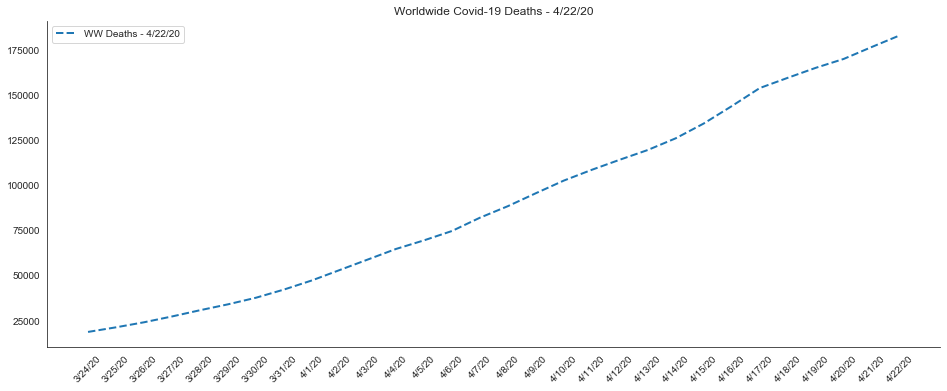

In [27]:
# simple graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2)
sns.despine(right=True, top=True)
ax.lines[0].set_linestyle("--")
plt.xticks(rotation=45)
ax.legend(['WW Deaths - {}'.format(str(date))]) 
plt.title("Worldwide Covid-19 Deaths - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("WW_deaths.png")

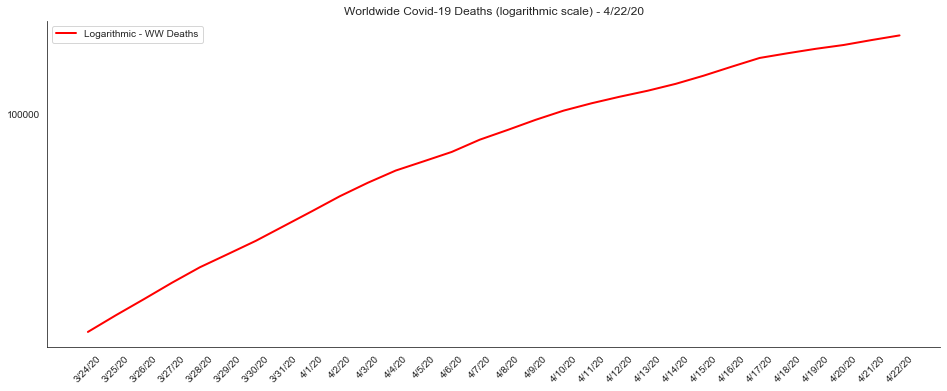

In [28]:
# look at logarithmic growth
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2, color='red')
sns.despine(right=True, top=True)
ax.lines[0].set_linestyle("-")
plt.xticks(rotation=45)
ax.legend(['Logarithmic - WW Deaths']) 
plt.title("Worldwide Covid-19 Deaths (logarithmic scale) - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("WW_deaths_log.png")

## WW - > Multiple Country Timeseries

In [29]:
# melt dataset - Keep certain columns and change others to vertical axis(?)
covid_ww_long = pd.melt(covid, id_vars=covid.iloc[:, :4],
var_name='Date', value_name='Deaths')
covid_ww_long

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
24283,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/22/20,0
24284,NaN,South Sudan,6.877000,31.307000,4/22/20,0
24285,NaN,Western Sahara,24.215500,-12.885800,4/22/20,0
24286,NaN,Sao Tome and Principe,0.186360,6.613081,4/22/20,0


In [30]:
# group countries by date - sort is False here because the date is not the sort
countries = covid_ww_long.groupby(['Date', 'Country/Region'], sort=False).sum().reset_index()

# drop columns that don't make sense
countries.drop(['Lat','Long'], axis=1, inplace=True)

# look at timeseries 
countries

,Date,Country/Region,Deaths
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0
...,...,...,...
17015,4/22/20,Malawi,3
17016,4/22/20,South Sudan,0
17017,4/22/20,Western Sahara,0
17018,4/22/20,Sao Tome and Principe,0


In [31]:
# check that it matches above summary
top = countries[countries['Date']==date].sort_values(by='Deaths', ascending = False).head(10)
top

,Date,Country/Region,Deaths
16991,4/22/20,US,46583
16912,4/22/20,Italy,25085
16973,4/22/20,Spain,21717
16891,4/22/20,France,21373
16989,4/22/20,United Kingdom,18151
16851,4/22/20,Belgium,6262
16908,4/22/20,Iran,5391
16895,4/22/20,Germany,5279
16867,4/22/20,China,4636
16941,4/22/20,Netherlands,4068


In [32]:
# total deaths in top
top['Deaths'].sum()

158545

### Graphs

In [33]:
# add a column for LEGEND to top
top['legend']= top['Country/Region'] + ' - ' + top['Deaths'].astype(str)

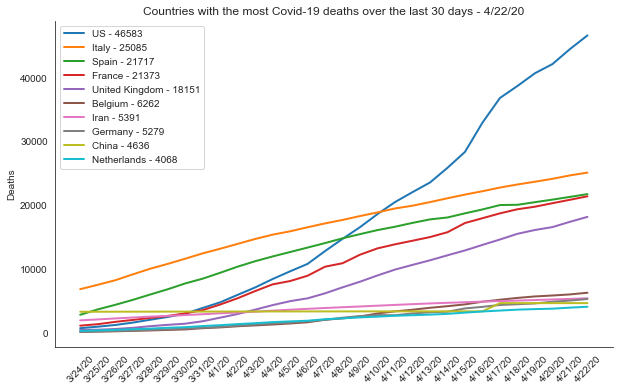

In [34]:
# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# set ATTRIBUTEs for each dataset
for i in top['Country/Region']:
    # set data to last 30 days
    df = countries[countries['Country/Region' ] == i].tail(30)
    # set graph
    g = sns.lineplot(ax=ax, x='Date', y='Deaths', data=df, sort=False, linewidth=2)  

# set date 
current_date = str(date) 

# remove spines
sns.despine(right=True, top=True)
sns.set_style('white')

# set TITLE
g.set_title("Countries with the most Covid-19 deaths over the last 30 days - {}".format(current_date))

# set extras
g.set_xlabel("")
plt.legend(top['legend'])
plt.xticks(rotation=45)
plt.show()

# save graph to a FILENAME
fig.savefig("Top10_countries.png")

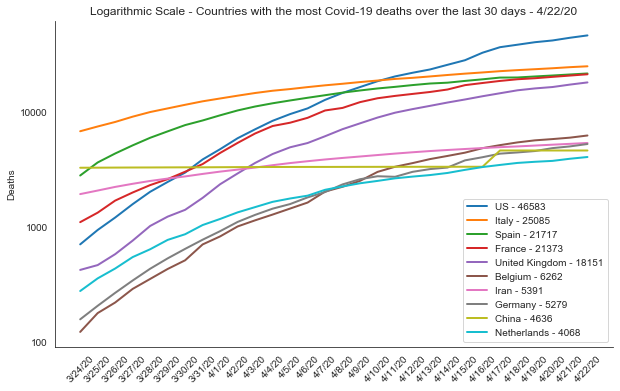

In [35]:
# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# set log scale
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )

# set ATTRIBUTEs for each dataset
for i in top['Country/Region']:
    # set data to last 30 days
    df = countries[countries['Country/Region' ] == i].tail(30)
    # set graph
    g = sns.lineplot(ax=ax, x='Date', y='Deaths', data=df, sort=False, linewidth=2)  

# set line style
ax.lines[0].set_linestyle("-")

# set date 
current_date = str(date) 

# remove spines
sns.despine(right=True, top=True)
sns.set_style('white')

# set TITLE
g.set_title("Logarithmic Scale - Countries with the most Covid-19 deaths over the last 30 days - {}".format(current_date))

# set extras
g.set_xlabel("")
plt.legend(top['legend'])
plt.xticks(rotation=45)
plt.show()

# save graph to a FILENAME
fig.savefig("Top10_countries_log.png")

## Arizona timeseries

In [36]:
# AZ Deaths by Date, ICU and Population 
AZ = county_deaths[county_deaths['Province_State']=='Arizona']

In [37]:
# investigate AZ dataset
AZ.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
101,84004001,US,USA,840,4001.0,Apache,Arizona,US,35.394650,-109.489238,...,4001.0,Apache,AZ,Arizona,4.0,4.0,0.0,71602.0,14107.0,0.197
102,84004003,US,USA,840,4003.0,Cochise,Arizona,US,31.879347,-109.751609,...,4003.0,Cochise,AZ,Arizona,4.0,4.0,12.0,126516.0,35231.0,0.278
103,84004005,US,USA,840,4005.0,Coconino,Arizona,US,35.838834,-111.770718,...,4005.0,Coconino,AZ,Arizona,3.0,3.0,41.0,138639.0,23195.0,0.167
104,84004007,US,USA,840,4007.0,Gila,Arizona,US,33.801901,-110.813278,...,4007.0,Gila,AZ,Arizona,3.0,3.0,8.0,53145.0,18752.0,0.353
105,84004009,US,USA,840,4009.0,Graham,Arizona,US,32.931669,-109.888218,...,4009.0,Graham,AZ,Arizona,1.0,1.0,0.0,37700.0,6933.0,0.184


In [38]:
# drop extra columns (not dates)
drops = ['UID','iso2','iso3','code3','Province_State','Country_Region','cnty_fips','cnty_name','st','state','hospitals_in_cost_reports','Hospitals_in_HC','all_icu','Total_pop','60plus','60plus_pct']
AZ_dates = AZ.drop(drops, axis=1,inplace=False)
AZ_dates.tail()

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
113,4023.0,Santa Cruz,31.525090,-110.847909,"Santa Cruz, Arizona, US",46498,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,4025.0,Yavapai,34.599339,-112.553859,"Yavapai, Arizona, US",235099,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
115,4027.0,Yuma,32.768957,-113.906667,"Yuma, Arizona, US",213787,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
3159,80004.0,Out of AZ,0.000000,0.000000,"Out of AZ, Arizona, US",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3211,90004.0,Unassigned,0.000000,0.000000,"Unassigned, Arizona, US",0,0,0,0,0,...,18,24,27,28,42,0,1,1,0,0


## Calculating METRICS

In [39]:
# Yesterday's date

# Today's date
today = datetime.now()

# if time is after 5pm (Tucson time), then use today's date 
today5pm = today.replace(hour=17, minute=1, second=0, microsecond=0)
if today > today5pm:
    date_ext = today  

# otherwise use yesterday's date for data
else:
    date_ext = today - timedelta(1)
    
# define yesterday (external) is in datetime format
yesterday_ext = date_ext - timedelta(1)

# yesterday in string format
yesterday = yesterday_ext.strftime('%D').lstrip("0").replace(" 0", " ")
yesterday = yesterday.replace("/0", "/")
yesterday

'4/21/20'

In [52]:
# Add Changes , Pct_change, and Pct_pop columns
AZ_dates['Change'] = AZ_dates[date] - AZ_dates[yesterday]
AZ_dates['Pct_change'] = AZ_dates['Change']/AZ_dates[yesterday]*100
AZ_dates['Deaths_per_mil']= AZ_dates[date]/AZ_dates['Population']*1000000

### Metrics for Total AZ Deaths by County

In [53]:
# Show list of counties and current deaths by Population size
AZ_dates = AZ_dates.sort_values(by='Population', ascending=False)

# Add all metrics - rounded
AZ_dates[['Combined_Key', 'Population', date,'Change', 'Pct_change','Deaths_per_mil']].round()

,Combined_Key,Population,4/22/20,Change,Pct_change,Deaths_per_mil
108,"Maricopa, Arizona, US",4485414,97,14,17.0,22.0
111,"Pima, Arizona, US",1047279,68,3,5.0,65.0
112,"Pinal, Arizona, US",462789,8,1,14.0,17.0
114,"Yavapai, Arizona, US",235099,1,0,0.0,4.0
115,"Yuma, Arizona, US",213787,1,0,0.0,5.0
109,"Mohave, Arizona, US",212181,3,0,0.0,14.0
103,"Coconino, Arizona, US",143476,35,4,13.0,244.0
102,"Cochise, Arizona, US",125922,0,0,NaN,0.0
110,"Navajo, Arizona, US",110924,12,1,9.0,108.0
101,"Apache, Arizona, US",71887,5,0,0.0,70.0


### Back to timeseries by AZ county

In [54]:
# drop extra columns
AZ_dates.drop(['Change', 'Pct_change','Deaths_per_mil'], axis=1, inplace=True)
AZ_dates.tail()

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
105,4009.0,Graham,32.931669,-109.888218,"Graham, Arizona, US",38837,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,4012.0,La Paz,33.728542,-113.981003,"La Paz, Arizona, US",21108,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
106,4011.0,Greenlee,33.214988,-109.240528,"Greenlee, Arizona, US",9498,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3159,80004.0,Out of AZ,0.000000,0.000000,"Out of AZ, Arizona, US",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3211,90004.0,Unassigned,0.000000,0.000000,"Unassigned, Arizona, US",0,0,0,0,0,...,18,24,27,28,42,0,1,1,0,0


In [55]:
# melt dataset - Keep certain columns and change others to vertical axis(?)
AZ_counties = pd.melt(AZ_dates, id_vars=AZ_dates.iloc[:, :6],
var_name='Date', value_name='Deaths')
AZ_counties

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths
0,4013.0,Maricopa,33.348359,-112.491815,"Maricopa, Arizona, US",4485414,1/22/20,0
1,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,1/22/20,0
2,4021.0,Pinal,32.905256,-111.344948,"Pinal, Arizona, US",462789,1/22/20,0
3,4025.0,Yavapai,34.599339,-112.553859,"Yavapai, Arizona, US",235099,1/22/20,0
4,4027.0,Yuma,32.768957,-113.906667,"Yuma, Arizona, US",213787,1/22/20,0
...,...,...,...,...,...,...,...,...
1559,4009.0,Graham,32.931669,-109.888218,"Graham, Arizona, US",38837,4/22/20,0
1560,4012.0,La Paz,33.728542,-113.981003,"La Paz, Arizona, US",21108,4/22/20,1
1561,4011.0,Greenlee,33.214988,-109.240528,"Greenlee, Arizona, US",9498,4/22/20,0
1562,80004.0,Out of AZ,0.000000,0.000000,"Out of AZ, Arizona, US",0,4/22/20,0


In [64]:
# add a column for LEGEND to top
AZ_counties['legend']= AZ_counties['Admin2'] + ' - ' + AZ_counties['Deaths'].astype(str)
AZ_counties

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths,legend
0,4013.0,Maricopa,33.348359,-112.491815,"Maricopa, Arizona, US",4485414,1/22/20,0,Maricopa - 0
1,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,1/22/20,0,Pima - 0
2,4021.0,Pinal,32.905256,-111.344948,"Pinal, Arizona, US",462789,1/22/20,0,Pinal - 0
3,4025.0,Yavapai,34.599339,-112.553859,"Yavapai, Arizona, US",235099,1/22/20,0,Yavapai - 0
4,4027.0,Yuma,32.768957,-113.906667,"Yuma, Arizona, US",213787,1/22/20,0,Yuma - 0
...,...,...,...,...,...,...,...,...,...
1559,4009.0,Graham,32.931669,-109.888218,"Graham, Arizona, US",38837,4/22/20,0,Graham - 0
1560,4012.0,La Paz,33.728542,-113.981003,"La Paz, Arizona, US",21108,4/22/20,1,La Paz - 1
1561,4011.0,Greenlee,33.214988,-109.240528,"Greenlee, Arizona, US",9498,4/22/20,0,Greenlee - 0
1562,80004.0,Out of AZ,0.000000,0.000000,"Out of AZ, Arizona, US",0,4/22/20,0,Out of AZ - 0


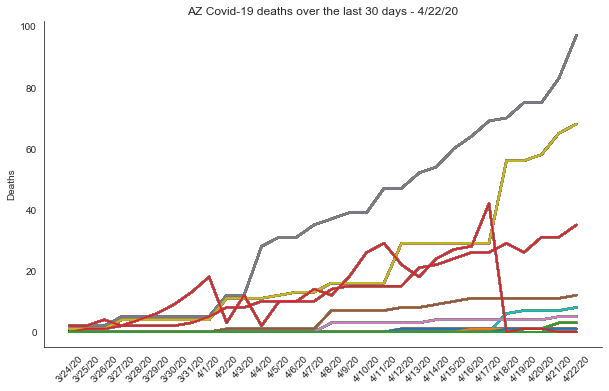

In [67]:
# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# # set log scale
# ax.set(yscale="log")
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )

# set ATTRIBUTEs for each dataset
for i in AZ_counties['Admin2']:
    # set data to last 30 days
    df = AZ_counties[AZ_counties['Admin2'] == i].tail(30)
    # set graph
    g = sns.lineplot(ax=ax, x='Date', y='Deaths', data=df, sort=False, linewidth=2)  

# set line style
ax.lines[0].set_linestyle("-")

# set date 
current_date = str(date) 

# remove spines
sns.despine(right=True, top=True)
sns.set_style('white')

# set TITLE
g.set_title("AZ Covid-19 deaths over the last 30 days - {}".format(current_date))

# set extras
g.set_xlabel("")
plt.xticks(rotation=45)
plt.show()

# save graph to a FILENAME
fig.savefig("AZ_counties.png")

### STUCK ON GETTING THE LEGEND RIGHT
#### and I guess they relabeled some entries this past week (4/18/20)

## Calculating Pima PCT_CHANGE

In [68]:
Pima_dates=AZ_dates[AZ_dates['Admin2']=='Pima'].copy()
Pima_dates

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
111,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,0,0,0,0,...,29,29,29,29,29,56,56,58,65,68


In [69]:
# unpivot DataFrame from wide to long format, optionally leaving identifiers set.
Pima_long = pd.melt(Pima_dates, id_vars=Pima_dates.iloc[:,:6],
var_name='Date', value_name='Deaths')
Pima_long.tail()


,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths
87,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/18/20,56
88,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/19/20,56
89,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/20/20,58
90,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/21/20,65
91,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/22/20,68


In [70]:
Pima30 = Pima_long.copy().tail(30)
Pima30[['PC']]=Pima30[['Deaths']].pct_change()
Pima30.tail()

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths,PC
87,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/18/20,56,0.931034
88,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/19/20,56,0.000000
89,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/20/20,58,0.035714
90,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/21/20,65,0.120690
91,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/22/20,68,0.046154


In [71]:
# set dataset for graphs
df = Pima30
df=df[df['Deaths']>0]
df.tail(10)

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths,PC
82,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/13/20,29,0.000000
83,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/14/20,29,0.000000
84,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/15/20,29,0.000000
85,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/16/20,29,0.000000
86,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/17/20,29,0.000000
87,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/18/20,56,0.931034
88,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/19/20,56,0.000000
89,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/20/20,58,0.035714
90,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/21/20,65,0.120690
91,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/22/20,68,0.046154


Not helpful because reporting for Pima seems to be once or twice weekly rather than daily

## TO DO:
1. Change data to look at increment per day per country - KEY!!!!!!!!!
2. Look at rate of increase
3. Look at time-series - # of days vs # of deaths, # of days vs. # of cases
4. Seperate out test cases vs training case
    - US separately is the Test case
    - outlier - South Korea, Singapore, China
    - ROW is the training case
5. Look at 2 plots
    - in deaths 
    - in deaths as a % of pop
    